In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
df.shape

(100, 3)

In [8]:
import matplotlib.pyplot as plt

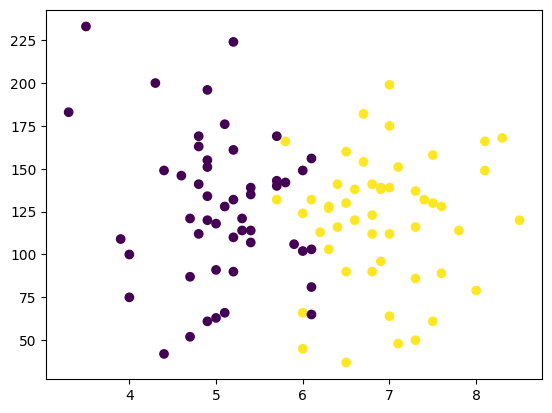

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.show()

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [22]:
X_train

,cgpa,iq
63,6.3,128.0
2,5.3,121.0
82,6.5,37.0
24,4.7,121.0
27,6.0,124.0
...,...,...
49,5.4,135.0
28,5.2,90.0
6,5.7,143.0
79,6.5,90.0


In [23]:
X_test

,cgpa,iq
68,4.0,75.0
53,8.3,168.0
42,7.6,89.0
74,6.7,154.0
44,7.5,61.0
31,3.9,109.0
21,7.1,151.0
76,4.9,155.0
20,6.6,120.0
14,6.1,103.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
X_train

array([[ 0.31101609,  0.09599931],
       [-0.60373711, -0.07829338],
       [ 0.49396672, -2.16980569],
       [-1.15258902, -0.07829338],
       [ 0.03659013, -0.00359652],
       [-0.96963838, -1.57223074],
       [-0.23783583,  0.19559513],
       [-0.69521243, -0.3521819 ],
       [-1.42701498,  0.61887738],
       [-0.96963838,  0.24539304],
       [ 0.95134332,  1.86382518],
       [ 0.859868  , -0.70076728],
       [-1.24406434,  0.54418052],
       [-0.23783583,  1.1168565 ],
       [ 0.12806545,  0.79317008],
       [ 0.03659013, -1.97061404],
       [-1.0611137 ,  1.1168565 ],
       [-0.96963838,  1.78912832],
       [-2.43324349,  1.46544189],
       [ 1.40871992,  0.14579722],
       [ 0.95134332, -0.30238399],
       [ 1.40871992,  0.84296799],
       [-1.0611137 ,  0.41968574],
       [-0.14636051,  0.44458469],
       [-1.0611137 , -0.30238399],
       [ 0.03659013, -1.44773596],
       [-1.5184903 ,  1.88872414],
       [ 0.4024914 , -0.20278816],
       [ 1.95757183,

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[-1.79291626, -1.22364536],
       [ 2.14052247,  1.09195755],
       [ 1.50019523, -0.87505998],
       [ 0.67691736,  0.74337216],
       [ 1.40871992, -1.57223074],
       [-1.88439157, -0.37708086],
       [ 1.04281864,  0.6686753 ],
       [-0.96963838,  0.76827112],
       [ 0.58544204, -0.10319234],
       [ 0.12806545, -0.52647459]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
clg = LogisticRegression()

In [34]:
clg.fit(X_train,y_train) # Model Training

LogisticRegression()

In [37]:
y_pred = clg.predict(X_test)

In [36]:
y_test

,placement
68,0
53,1
42,1
74,1
44,1
31,0
21,1
76,0
20,1
14,0


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,y_pred)

0.9

In [40]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

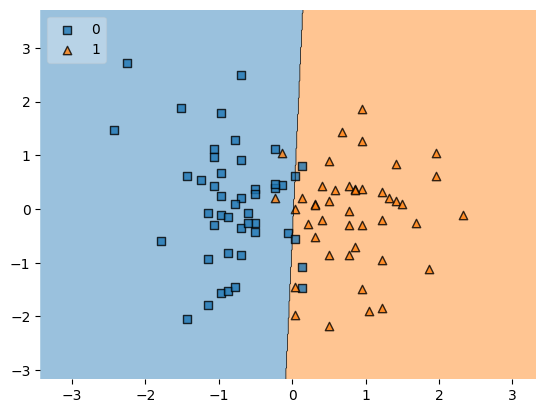

In [41]:
plot_decision_regions(X_train, y_train.values, clf=clg, legend=2)

In [42]:
import pickle

In [43]:
pickle.dump(clg,open('model.pkl','wb'))